# TASK #1 UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


# IMPORT DATASETS AND LIBRARIES

In [ ]:
# Get the required dependencies
! pip install bubbly
#! pip install iplot ##iplot installed ahead from the plotly package
! pip install chart_studio

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot

In [ ]:
# Import csv file into pandas dataframe
happy_df = pd.read_csv('world_happiness_data.csv')

In [4]:
happy_df.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


MINI CHALLENGE #1:
- Find out how many samples exist in the DataFrame using two different methods.
- Select your own country from the dataframe and explore scores. Perform sanity check.

In [5]:
len(happy_df)

156

In [6]:
happy_df.shape

(156, 9)

In [7]:
happy_df[happy_df['Country or region']=='Pakistan']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
66,67,Pakistan,5.653,0.677,0.886,0.535,0.313,0.22,0.098


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [8]:
happy_df.isna().sum()


,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


In [11]:
happy_df.describe(include='all')

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
unique,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,78.500000,NaN,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,NaN,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,NaN,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,NaN,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,NaN,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,NaN,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250


In [12]:
happy_df.duplicated().sum()

np.int64(0)

In [13]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [14]:
happy_df[happy_df['Score'] == 7.769000]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


#PERFORM DATA VISUALIZATION - PART 1

In [ ]:
# Plot the pairplot
fig = plt.figure(figsize = (20,20))
sns.pairplot(happy_df, hue = 'Score')



In [ ]:
columns = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy',
    'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
plt.figure(figsize = (10, 10))
for i in range(len(columns)):
  plt.subplot(8, 2, i+1)
  sns.displot(happy_df[columns[i]],color='skyblue', bins=20, kde=True);
  plt.title(columns[i])

plt.tight_layout()

MINI CHALLENGE #3:
- Plot the correlation matrix and comment on the results.


In [19]:
corr = happy_df.drop(['Country or region', 'Overall rank'], axis = 1).corr()
corr

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


<Axes: >

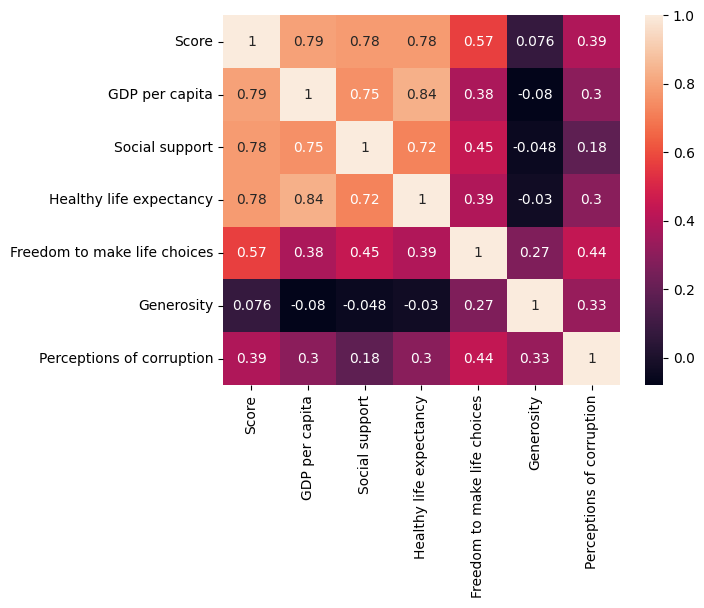

In [20]:
sns.heatmap(corr, annot = True)

#PERFORM DATA VISUALIZATION - PART #2
Interactive plots using plotly

In [22]:
fig = px.scatter(happy_df, x = 'GDP per capita', y = "Score")
fig.update_layout(title_text = 'Happiness Score vs GDP per Capita')
fig.show()

In [23]:
# Plot the relationship between score and freedom to make life choices

fig = px.scatter(happy_df, x = 'Freedom to make life choices', y = "Score", size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(title_text = 'Happiness Score vs Freedom to make life choices')
fig.show()

MINI CHALLENGE #4:
- Plot a similar type of plots for 'Healthy life expectancy' and 'Score'

In [24]:
fig = px.scatter(happy_df , x = 'Healthy life expectancy',y ='Score' , text = 'Country or region' )
fig.update_layout(title_text = 'Healthy life expectancy vs Score')
fig.show()

#PREPARE THE DATA TO FEED THE CLUSTERING MODEL

This is a unsupervised Machine Learning Model so target columns will not be used to train the model

In [25]:
#Drop any column related to target
df_seg = happy_df.drop(['Country or region', 'Overall rank','Score'], axis = 1)
df_seg

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.411
152,0.476,0.885,0.499,0.417,0.276,0.147
153,0.350,0.517,0.361,0.000,0.158,0.025
154,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
# Scale the data
scale = StandardScaler()
scaled_data = scale.fit_transform(df_seg)
scaled_data

In [27]:
scaled_data.shape

(156, 6)

#FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

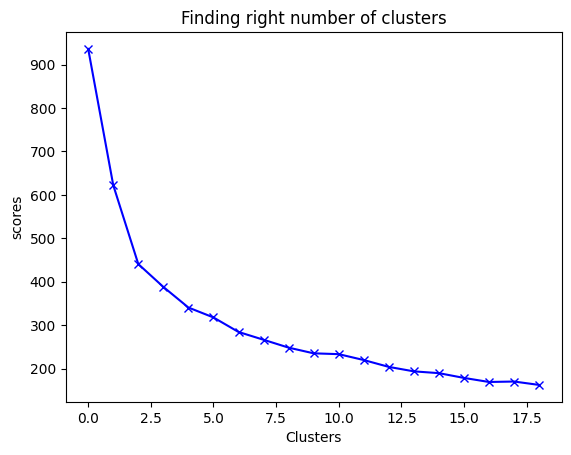

In [28]:
scores= []
values = range(1,20)
for i in values:
  kmeans = KMeans(i)
  kmeans.fit(scaled_data)
  scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

In [29]:
# From this we can observe that 3rd cluster seems to be forming the elbow of the curve.
# Let's choose the number of clusters to be 3.

# TASK #9: APPLY K-MEANS METHOD

In [30]:
kmeans = KMeans(3)
kmeans.fit(scaled_data)
labels = kmeans.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [31]:
centers = kmeans.cluster_centers_
centers

array([[ 0.35620452,  0.41292969,  0.41151963, -0.05484171, -0.5351172 ,
        -0.4653565 ],
       [-1.14599692, -1.11830829, -1.15188472, -0.4600627 ,  0.28598455,
        -0.11293721],
       [ 1.10782632,  0.88003999,  0.94894867,  1.0534797 ,  1.09654416,
         1.64905312]])

In [32]:
centers.shape

(3, 6)

In [33]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_seg.columns])
cluster_centers

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.356205,0.412930,0.411520,-0.054842,-0.535117,-0.465357
1,-1.145997,-1.118308,-1.151885,-0.460063,0.285985,-0.112937
2,1.107826,0.880040,0.948949,1.053480,1.096544,1.649053


In [34]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scale.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_seg.columns])
cluster_centers


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.046600,1.331962,0.824563,0.384738,0.134038,0.06675
1,0.450060,0.875300,0.447240,0.326860,0.212000,0.09996
2,1.345077,1.471269,0.954269,0.543038,0.288962,0.26600


* Cluster 0: This cluster represents countries with medium GDP per capita,
high social support, and medium healthy life expectancy. They also have medium freedom to make life choices, low generosity, and low perceptions of corruption.

* Cluster 1: This cluster tends to have low GDP per capita, low social support, and low healthy life expectancy. They exhibit low freedom to make life choices, medium generosity, and low perceptions of corruption.

* Cluster 2: This cluster is characterized by high GDP per capita, high social support, and high healthy life expectancy. Countries in this cluster also show high freedom to make life choices, high generosity, and high perceptions of corruption.

In [35]:
labels.shape

(156,)

In [36]:
labels.max()

np.int32(2)

In [37]:
labels.min()

np.int32(0)

In [38]:
y_kmeans = kmeans.fit_predict(scaled_data)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [39]:
# concatenate the clusters labels to our original dataframe
happy_df_cluster = pd.concat([happy_df, pd.DataFrame({'cluster':labels})], axis = 1)
happy_df_cluster

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,1
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,1
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,1
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,1


In [ ]:
for i in df_seg.columns:
  plt.figure(figsize = (35, 10))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = happy_df_cluster[happy_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i, j))

  plt.show()



# VISUALIZE THE CLUSTERS

In [41]:
# Plot the relationship between cluster and score

fig = px.scatter(happy_df_cluster, x = 'cluster', y = "Score",
           size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(
    title_text = 'Happiness Score vs Cluster'
)
fig.show()

In [42]:
# Plot the relationship between cluster and GDP

fig = px.scatter(happy_df_cluster, x='cluster', y='GDP per capita',
           size='Overall rank', color="Country or region", hover_name="Country or region",
          trendline= "ols")

fig.update_layout(
    title_text='GDP vs Clusters'
)
fig.show()

In [46]:
# Visualizing the clusters geographically
data = dict(type = 'choropleth',
           locations = happy_df_cluster["Country or region"],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = happy_df_cluster['cluster'],
           text = happy_df_cluster["Country or region"],
           colorbar = {'title':'Clusters'})

layout = dict(title = 'Geographical Visualization of Clusters',
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)